# [파이🌞] 정기세션 과제_1107

# 1. 문장 간 유사도 구하기
* **주어진 코드의 빈칸을 채우고, 결과를 확인하세요.**
* **첫 번째 문장과 가장 유사도가 높은 문장을 적고, cosine 유사도가 얼마인지도 아래 주석에 달아주세요.**

In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

def cos_similarity(v1, v2):
    dot_product=np.dot(v1,v2)
    l2_norm=(np.sqrt(sum(np.square(v1))))*np.sqrt(sum(np.square(v2)))
    similarity=dot_product/l2_norm
    
    return similarity

In [2]:
doc_list=['if you go to the right street, the ShakeShake will be there',
          'if you go to the middle street, the KFC will not be there',
          'if you go to the left street, the Momstouch will be there',
          'if you go to the last street, the BurgerKing will be right there',]

tfidf_vect_simple=TfidfVectorizer()
feature_vect_simple=tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(4, 18)


In [3]:
feature_vect_dense=feature_vect_simple.todense()

vect1=np.array(feature_vect_dense[0]).reshape(-1,)
vect2=np.array(feature_vect_dense[1]).reshape(-1,)

similarity_simple=cos_similarity(vect1,vect2)
print('문장1, 문장2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

#아래에 계속해서 유사도를 측정하는 코드를 작성하세요.
vect1=np.array(feature_vect_dense[0]).reshape(-1,)
vect3=np.array(feature_vect_dense[2]).reshape(-1,)

similarity_simple=cos_similarity(vect1,vect3)
print('문장1, 문장3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect1=np.array(feature_vect_dense[0]).reshape(-1,)
vect4=np.array(feature_vect_dense[3]).reshape(-1,)

similarity_simple=cos_similarity(vect1,vect4)
print('문장1, 문장4 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장2 Cosine 유사도: 0.590
문장1, 문장3 Cosine 유사도: 0.644
문장1, 문장4 Cosine 유사도: 0.725


첫 번째 문장과 가장 유사도가 높은 문장: 문장4    
cosine 유사도: 0.725

# 2. 문서 유사도 구하기

* **주어진 코드의 빈칸을 채우고, 결과를 확인하세요.**
* **comfort_honda_accord_2008의 리뷰와 가장 문서 유사도가 높은 항목을 아래 주석으로 달아주세요.**


# ***앞선 파트에서 이용했던 opinion review 데이터를 사용하므로 미리 다운받아주세요***
* **링크: https://archive.ics.uci.edu/ml/datasets/Opinosis+Opinion+%26frasl%3B+Review 에서 data folder 다운로드로 들어가서 OpinosisDataset1.0.zip를 다운받아 주세요.**

In [7]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
import string

path=r'.\OpinosisDataset1.0\topics' #각자 경로 설정하기
all_files=glob.glob(os.path.join(path, "*data"))
filename_list=[]
opinion_text=[]

for file_ in all_files:
    df=pd.read_table(file_,index_col=None, header=0, encoding='latin1')
    filename_=file_.split('\\')[-1]
    filename=filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
document_df=pd.DataFrame({'filename':filename_list,'opinion_text':opinion_text})

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',ngram_range=(1,2), min_df=0.05, max_df=0.85 )

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\round\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\round\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
C:\Users\round\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


In [8]:
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster=KMeans(n_clusters=3, max_iter=10000,random_state=0) #어떤 함수를 사용해야 할까요
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_
document_df['cluster_label']=cluster_label

C:\Users\round\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

car_indexes=document_df[document_df['cluster_label']==2].index #자동차에 대한 군집화를 사용합니다.
print('자동차로 군집화 된 문서들의 DataFrame Index:',car_indexes)

comparison_docname=document_df.iloc[car_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname, ' 와 타 분서 유사도 #####')

similarity_pair=cosine_similarity(feature_vect[car_indexes[0]],feature_vect[car_indexes])
print(similarity_pair)

자동차로 군집화 된 문서들의 DataFrame Index: Int64Index([6, 7, 16, 17, 18, 22, 25, 29, 37, 47], dtype='int64')
##### 비교 기준 문서명  comfort_honda_accord_2008  와 타 분서 유사도 #####
[[1.         0.83947825 0.14724757 0.29862693 0.23287578 0.14187867
  0.2666265  0.23536241 0.64020104 0.03199719]]


Text(0.5, 1.0, 'comfort_honda_accord_2008')

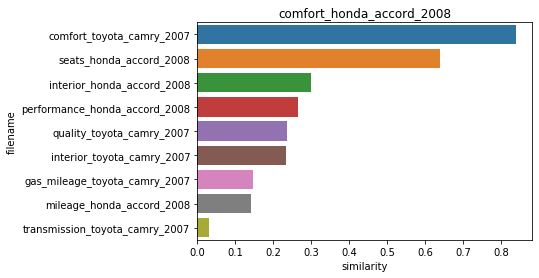

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sorted_index=similarity_pair.argsort()[:,::-1]
sorted_index=sorted_index[:,1:]

car_sorted_indexes=car_indexes[sorted_index.reshape(-1)]

car_1_sim_value=np.sort(similarity_pair.reshape(-1))[::-1]
car_1_sim_value=car_1_sim_value[1:]

car_1_sim_df=pd.DataFrame()
car_1_sim_df['filename']=document_df.iloc[car_sorted_indexes]['filename']
car_1_sim_df['similarity']=car_1_sim_value

sns.barplot(x='similarity',y='filename',data=car_1_sim_df)
plt.title(comparison_docname)

답: comfort_toyota_camry_2007